In [1]:
#In this modelling section of the Mexico City i have decided to use Python to make modelling easier to programme

import pandas as pd

#Importing the pandas library as pd so we can read and load in the dataframes from the csv files for sensors cotaining the recorded pollutant and traffic intensities using the function pd.read_csv()

UIZ = pd.read_csv('UIZ.csv')
PED = pd.read_csv('PED.csv')
SFE = pd.read_csv('SFE.csv')

In [2]:
#For PCA i have chosen to do it on the joined dataframes because it will provide more rows of data which will allow the PCA to be more accurate as the amount of data will triple by combining all three sensors datasets, i want the PCA to be as accurate as possible so the more data for one PCA will give the PCA more information to work with to give the PCA insight into how all the data behaves as a whole

concatenated_sensors = pd.concat([UIZ, PED, SFE], ignore_index=True)

#Using the function pd.concat() from the pandas library to join all the data sets (UIZ, PED, SFE) together and then because of the index to get all the data we input the variable ignore_index =True, so that we can then reset the index to have all 1902 rows in the dataset shown when return the new combined dataset we have defined

#If we don't ignore the index, because the date columns are the same for each sensor data frame, there will only be produced about 600 (1 significant figure) rows for the combined dataset

concatenated_sensors = concatenated_sensors.reset_index(drop=True)

#To reset the index the function dataset.reset_index(drop=True) is used which gives all 1902 rows from each of the sensor datasets

concatenated_sensors

#Returning the dataframe by typing the name of the dataframe with index reset we have defined

Unnamed: 0   dateUTCShiftedDown        date  month  weekday  \
0              0  2020-12-14 06:00:00  2020-12-14     12        1   
1              1  2020-12-14 07:00:00  2020-12-14     12        1   
2              2  2020-12-14 08:00:00  2020-12-14     12        1   
3              3  2020-12-14 09:00:00  2020-12-14     12        1   
4              4  2020-12-14 10:00:00  2020-12-14     12        1   
...          ...                  ...         ...    ...      ...   
1897         660  2021-03-26 11:00:00  2021-03-26      3        5   
1898         661  2021-03-26 12:00:00  2021-03-26      3        5   
1899         662  2021-03-26 13:00:00  2021-03-26      3        5   
1900         663  2021-03-26 14:00:00  2021-03-26      3        5   
1901         664  2021-03-26 15:00:00  2021-03-26      3        5   

      UTC_hour_id   O3    CO  PM10  PM25  PMCO  SO2  NO2  NO  NOX     Green  \
0               7   14  0.10    31    19    13    1   31  10   41  0.049900   
1               8    5  0.50    34    22    11    1   47  50   97  0.073155   
2               9   10  0.50    52    29    24    3   41  27   67  0.078598   
3              10   19  0.50    55    33    22    3   38  23   61  0.085133   
4              11   28  0.40    53    33    21    2   32  17   49  0.078208   
...           ...  ...   ...   ...   ...   ...  ...  ...  ..  ...       ...   
1897           12   85  0.28    55    26    29    4   15   4   19  0.068963   
1898           13   97  0.26    54    26    27    3   13   3   17  0.066278   
1899           14  106  0.24    53    21    32    3   11   2   14  0.067571   
1900           15   99  0.16    70    28    42    3    8   2   10  0.069048   
1901           16   98  0.17    49    19    30    2    8   2   11  0.068187   

        Orange       Red     Brown  
0     0.010319  0.000849  0.000000  
1     0.016205  0.001243  0.000065  
2     0.024826  0.003567  0.000814  
3     0.028725  0.001937  0.000370  
4     0.031621  0.002731  0.000314  
...        ...       ...       ...  
1897  0.014254  0.000634  0.000028  
1898  0.015165  0.001172  0.000079  
1899  0.014972  0.000878  0.000323  
1900  0.012776  0.001146  0.000170  
1901  0.014678  0.000772  0.000062  

[1902 rows x 19 columns]

In [3]:
#There will be two PCAs which i will prgramme, by separating the dataframe into numerical only data for the pollutants and traffic intensities data separately, so there will be one PCA for the pollutants and then another for the traffic intensities

column_names = ["O3","CO","PM10", "PM25", "PMCO", "SO2", "NO2", "NO", "NOX"]

#Defining a list of strings of the pollutant column names to define a dataset of the pollutants only, as we are doing the PCA for the pollutants first

pollutants_only = concatenated_sensors[column_names]

#using square brackets with column_names list defined already to get the pollutants data only from the concatenated_sensors dataframe to define a new pollutants only dataframe

pollutants_only

#Returning the newly defined dataframe by typing the name of the dataframe we can see the dataframe we have just defined

O3    CO  PM10  PM25  PMCO  SO2  NO2  NO  NOX
0      14  0.10    31    19    13    1   31  10   41
1       5  0.50    34    22    11    1   47  50   97
2      10  0.50    52    29    24    3   41  27   67
3      19  0.50    55    33    22    3   38  23   61
4      28  0.40    53    33    21    2   32  17   49
...   ...   ...   ...   ...   ...  ...  ...  ..  ...
1897   85  0.28    55    26    29    4   15   4   19
1898   97  0.26    54    26    27    3   13   3   17
1899  106  0.24    53    21    32    3   11   2   14
1900   99  0.16    70    28    42    3    8   2   10
1901   98  0.17    49    19    30    2    8   2   11

[1902 rows x 9 columns]

In [4]:
pollutants_only.describe()

#The dataframe.describe() function to show the main metrics of the pollutants only dataframe, which gives us insight into how the data may behave before we develop the PCA

O3           CO         PM10         PM25         PMCO  \
count  1902.000000  1902.000000  1902.000000  1902.000000  1902.000000   
mean     42.721346     0.404359    47.338065    22.361199    24.997371   
std      27.714202     0.244880    19.810884    10.437179    13.381132   
min       1.000000     0.010000     5.000000     1.000000     1.000000   
25%      19.000000     0.220000    33.000000    15.000000    16.000000   
50%      41.000000     0.360000    45.000000    21.000000    22.000000   
75%      63.000000     0.530000    59.000000    29.000000    31.000000   
max     110.000000     1.530000   131.000000    63.000000   112.000000   

               SO2          NO2           NO          NOX  
count  1902.000000  1902.000000  1902.000000  1902.000000  
mean      3.538381    24.838591    10.138275    34.947950  
std       3.963318    11.533850    15.373393    23.588684  
min       1.000000     3.000000     1.000000     5.000000  
25%       1.000000    16.000000     1.000000    18.000000  
50%       2.000000    24.000000     3.000000    28.000000  
75%       4.000000    33.000000    12.000000    46.000000  
max      28.000000    64.000000   104.000000   143.000000

In [5]:
keys = pollutants_only.keys()

#Using the dataframe.keys() function will show us all the components which we will be using in the PCA for the pollutants only

shape = pollutants_only.shape

#Also using the dataframe.shape function to show the dimensions of the pollutants_only data frame shows us how much data we are dealer with

print( "keys:", keys)
print("shape:", shape)

#We then use print() to return this with a string showing us which is the keys and which is the shape of the dataframe

keys: Index(['O3', 'CO', 'PM10', 'PM25', 'PMCO', 'SO2', 'NO2', 'NO', 'NOX'], dtype='object')
shape: (1902, 9)


In [6]:
#To peform the PCA on the pollutants PCA must import PCA from the sklearn.decomposition library

from sklearn.decomposition import PCA

#To prepare the data in the correct way which will work with the PCA() function we must import StandardScaler from the sklearn.preprocessing library

from sklearn.preprocessing import StandardScaler

#Then we must split the dataset into train and train test variables by importinf train_test_split from the sklearn.model_selection library

from sklearn.model_selection import train_test_split

#For the machine learning module to give the scores of the PCA and show us how the score will change with the number of the principal components

# We will use the LinearRegrssion model as LogisticRegression gives a much lower score, importing LinearRegression from the sklearn.linear_model

from sklearn.linear_model import LinearRegression

In [32]:
#Defining our target variable, as we don't have a specified target variable so i just used the O3 pollutant as the target variable, and dropped O3 from the data for rest_of_data variable using thr dataframe.drop() function specifying the column axis which the column to be dropped belongs to

target = pollutants_only['O3']
rest_of_data = pollutants_only.drop(['O3'], axis=1)

#Next we process the data defining StandardScaler() as a variable

scaler = StandardScaler()
scaled_data_no_pca = scaler.fit_transform(rest_of_data)

#Then i scaled the data using the scaler.fit_transform() function with the variable just defined

x_train0, x_test0, y_train0, y_test0 = train_test_split(scaled_data_no_pca, target, test_size=0.3, random_state=30)

#We split the data using the train, test, plit with the train_test_split() parsing in the scaled data and the target data, defining the test_size and random_state values

model = LinearRegression()
model.fit(x_train0, y_train0)
model.score(x_test0, y_test0)

#We define the the LinearRegression() function to a variable to be called, so we call the model.fit() function with the new split train variable and then call the model.score() function to give the score of the model which tells us how accurately the model predicts the data

0.6372090334823826

In [24]:
#Now this is where we start the PCA for the pollutants

scaler = StandardScaler()
scaled_data = scaler.fit_transform(rest_of_data)
 #scale the data as before
    
pca = PCA(n_components=8)

#define the PCA() function variable with all the principal components used inside the PCA()

scaled_x_pca = pca.fit_transform(scaled_data)

#Fitting the scaled data using the function pca.fit_transform()

x_train, x_test, y_train, y_test = train_test_split(scaled_x_pca, target, test_size=0.3, random_state=30)

#Train, test, split data as before

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

#Now we apply the linear regression model to the PCA fitting it and giving the score

#The pca score is only slightly different by plus 1e10^-16 of the non pca model score

0.6372090334823827

In [29]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(rest_of_data)

pca_2 = PCA(n_components=2)
scaled_x_pca_2 = pca_2.fit_transform(scaled_data)

x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(scaled_x_pca_2, target, test_size=0.3, random_state=30)

model = LinearRegression()
model.fit(x_train_pca, y_train_pca)
model.score(x_test_pca, y_test_pca)

#Doing the exact same as above except we do the pca with the minimum amount of principal components which gives the majority of the data, here we see its the first 2 principal components giving a score of about 0.54, when with all principal components the score is comparatively 0.64 to two significant figures

#So the first two principal components give the majority of the data by comparison of the scores

0.5420267481850652

In [9]:
columns = ['CO', 'PM10', 'PM25', 'PMCO', 'SO2', 'NO2', 'NO', 'NOX', "O3"]

#defining the columns list again for the pollution components that are used in the PCA, that will be used to show the principal components for each pollutant variable

pca.fit(pollutants_only)

#pca.fit() is used to fit the pollutants_only data frame in the pca into the format we want so we can use pca functions to get the principal components for the dataframe for example

pollutants_loadings = pd.DataFrame(pca.components_, columns= columns)

#using the pd.dataframe() function from the pandas library to create a table/dataframe of the principal components laoding to be used to represent the PCA visually later

#The function pca.components_ is used to calculate the principal components of each pollutant, and we parse this as the first variable in pd.DataFrame(), then equating columns to the list name also called columns will give the columns of the dataframe, this shows us what principal component values belongs to which pollutants

pollutants_loadings

#As before returning the name of the dataframe for loadings  we have just defined by typing the name at the end to see the values of the principal components for each pollutant component

CO      PM10      PM25      PMCO       SO2       NO2        NO  \
0 -0.692476  0.004602 -0.167371 -0.052154 -0.115437  0.003931  0.209956   
1  0.205533  0.004646  0.696759  0.314509  0.382014  0.039287  0.223409   
2 -0.658521 -0.004023  0.330919 -0.080470  0.410621  0.001507 -0.069206   
3  0.095345 -0.002991 -0.026019 -0.477124  0.450992 -0.099445 -0.513057   
4 -0.187144 -0.003615  0.201935  0.565129 -0.361902  0.087264 -0.550961   
5  0.021661 -0.002149 -0.047737 -0.109987  0.061703  0.990419 -0.012027   
6  0.000183  0.018829  0.576920 -0.576514 -0.577523 -0.000238  0.016900   
7 -0.000077  0.008335 -0.017581  0.017677  0.017178 -0.000871  0.577825   

        NOX        O3  
0  0.347286  0.558295  
1  0.162749  0.386612  
2 -0.335482 -0.405465  
3  0.534464  0.020346  
4  0.348170 -0.203586  
5  0.016187  0.002538  
6  0.017669 -0.017588  
7  0.576953 -0.576418

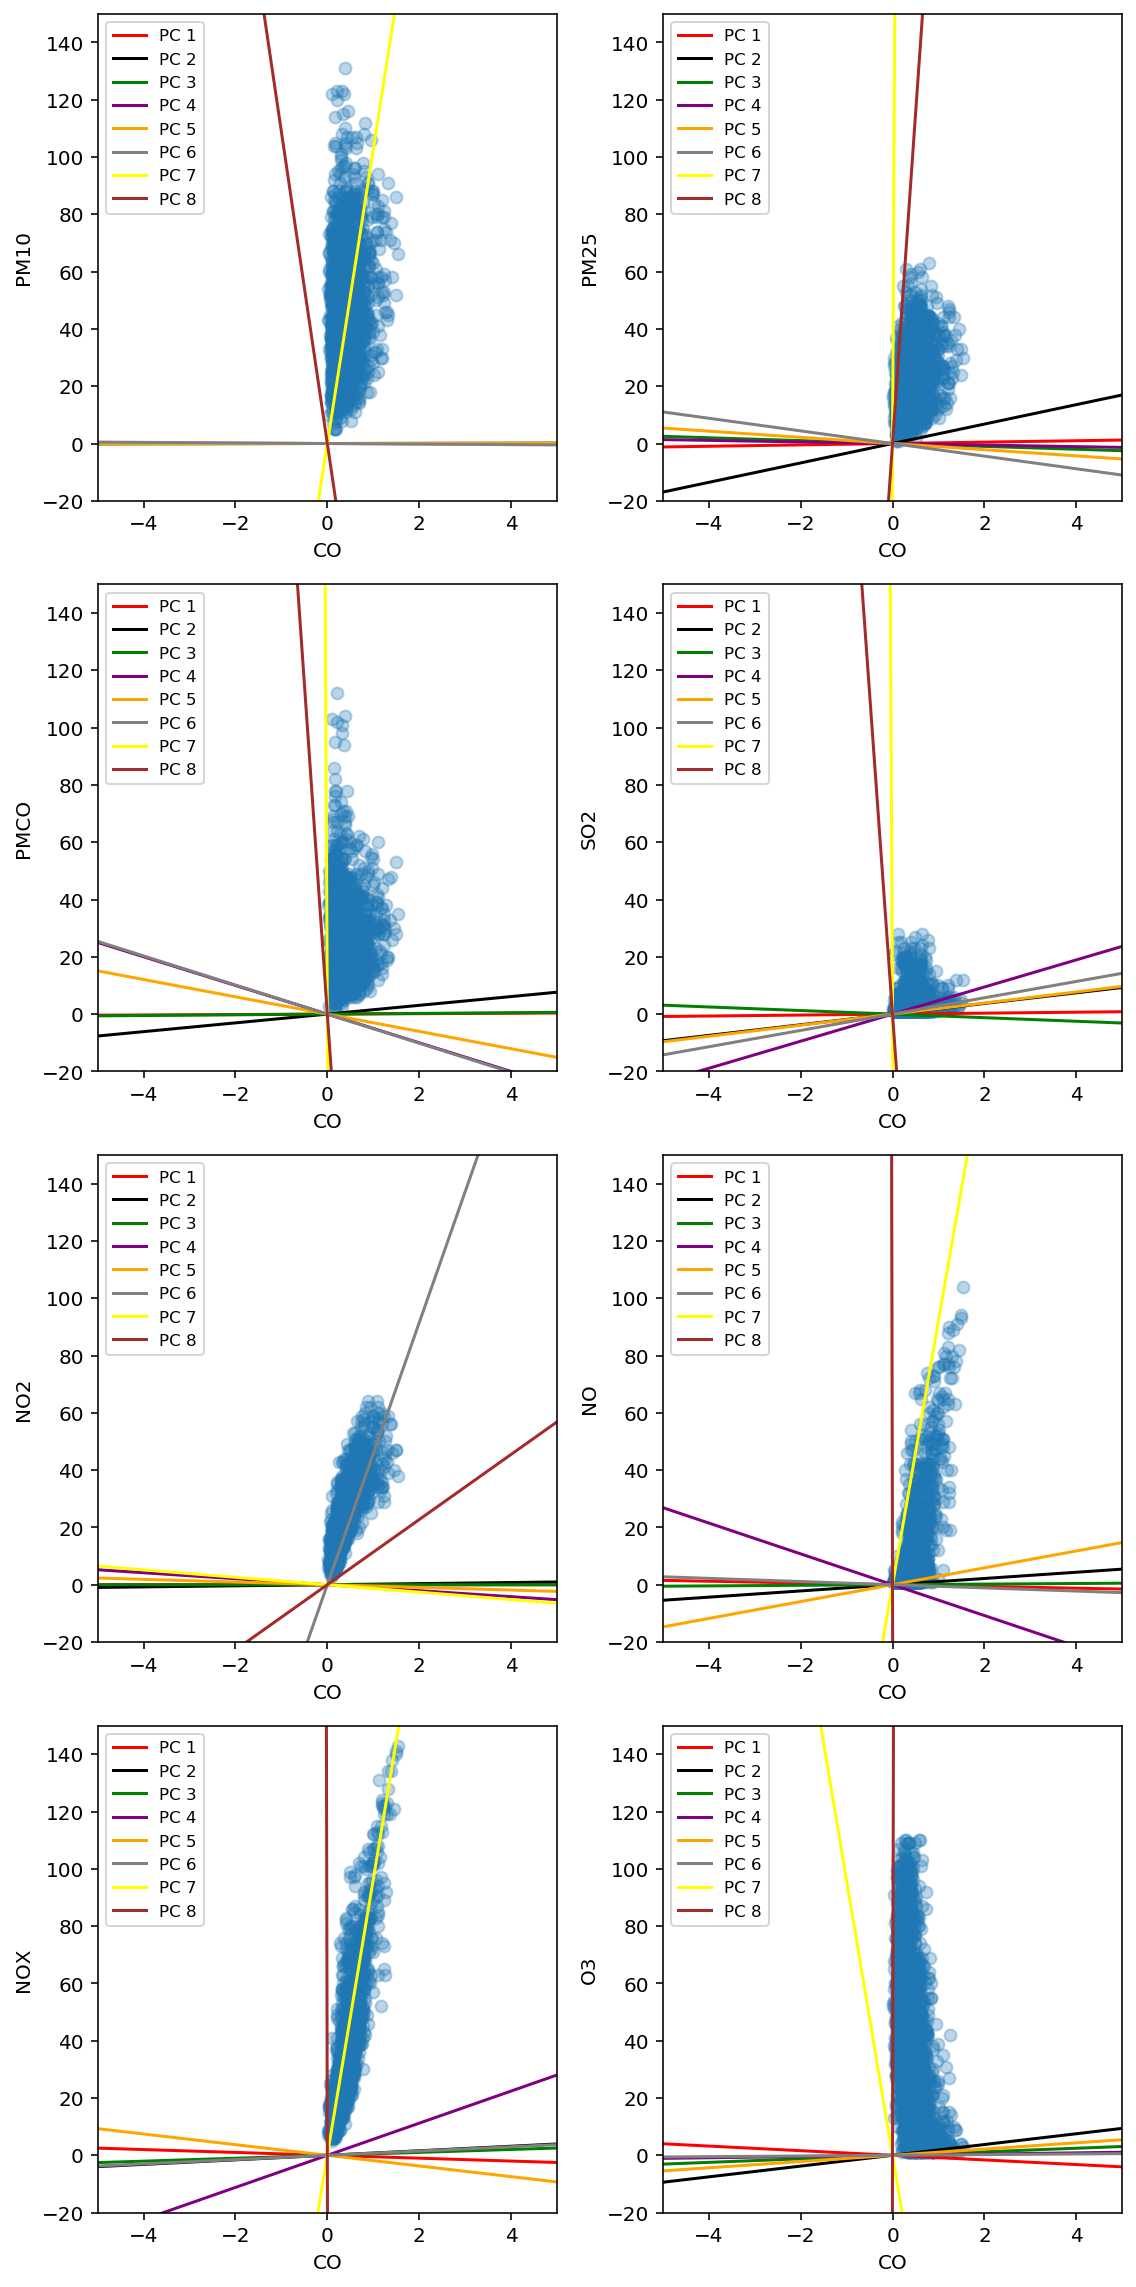

In [65]:
#Now we use the laodings values just calculated to make visual scatter plots of the pollutants only data with one pollutant against another pollutant, using for loops to have all the possible combinations of pollutants

#To get all the possible combinations usually i would use two for loops, but because the values for CO are much lower than the others because it is measured in ppm and others are measured in micro grams per meter cubed or ppb, so the y and x limits are signigicantly different to get a clear spread of the data distribution, so only one for loop is used to get the rest of the pollutants to be combined with CO, we call the pollutants in the defined function comp_line which gives the line for each Principal Component

#We defined the function for the principal components line by returning the equation of straight line with the variable, which makes the data in the form of an array using the function np.array() from the pandas library, inside the array function the function line.get_xlim() is used to get the x_limits of the data

import numpy as np
def comp_line(m, c, line):
    x = np.array(line.get_xlim())
    return (x, c + m*x)

fig, lines = plt.subplots(4, 2, figsize=(8, 16))

#Define subplots to put all the plots in a grid whereby they can all be exported as one image, the first two parameter define the rows and columns number, and figsize for the size of the figure

for i in range(1,9):
        line = lines[(i-1) // 2][(i-1) % 2]
        
        #Equation calculates each coordinate for each plot in the grid as we iterate through the i variable for the indexes which are inputted into the data sets, we use i as the plot count in this equation we are using one for loop here so we can choose i as our summing plot count, but for two for loops as we define below we will have to define the plot counts differently but the equation will be the same
        
        line.scatter(pollutants_only['CO'], pollutants_only[columns[i]], alpha=0.3)
        
        #In the for loop we call line.scatter() function to plot the scaatter plot of the pollutant combinations data, where x=pollutants_only['CO'] and y is equal it all the possible combinations with CO by iterating through the columns list with i
        
        line.set_xlim(-5,5)
        line.set_ylim(-20,150)
        line.set_xlabel("CO")
        line.set_ylabel(columns[i])
        #We define the scatter plot so we can call this to add our x and y limits to it using the line.set_xlim() and line.set_ylim() functions
        #Also we define the x and y labels using the line.set_ylabel() and line.set_xlabel() functions
        line.plot(*comp_line(pollutants_loadings.loc[0, columns[i]]/ pollutants_loadings.loc[0, 'CO'], 0, line ), color = 'red', label='PC 1')
        line.plot(*comp_line(pollutants_loadings.loc[1, columns[i]]/ pollutants_loadings.loc[1, 'CO'], 0, line ), color = 'black', label='PC 2')
        line.plot(*comp_line(pollutants_loadings.loc[2, columns[i]]/ pollutants_loadings.loc[2, 'CO'], 0, line ), color = 'green', label='PC 3')
        line.plot(*comp_line(pollutants_loadings.loc[3, columns[i]]/ pollutants_loadings.loc[3, 'CO'], 0, line ), color = 'purple', label='PC 4')
        line.plot(*comp_line(pollutants_loadings.loc[4, columns[i]]/ pollutants_loadings.loc[4, 'CO'], 0, line ), color = 'orange', label='PC 5')
        line.plot(*comp_line(pollutants_loadings.loc[5, columns[i]]/ pollutants_loadings.loc[5, 'CO'], 0, line ), color = 'gray', label='PC 6')
        line.plot(*comp_line(pollutants_loadings.loc[6, columns[i]]/ pollutants_loadings.loc[6, 'CO'], 0, line ), color = 'yellow', label='PC 7')
        line.plot(*comp_line(pollutants_loadings.loc[7, columns[i]]/ pollutants_loadings.loc[7, 'CO'], 0, line ), color = 'brown', label='PC 8')
        
        #Now we have 8 line plots using the line.plot() function and we then call the comp_line() function using dataset.loc[] to get the values of each principal component value for each pollutant, inputting the index of the loadings dataframe we want for each principal component, thats why there are 8 line plots for each of the 8 principal components to show how the principal components behave
        
        
        line.legend(loc='upper left', fontsize='small')
        
        
        #we add labels and color to the line plot so we have a legend in each plot to show which line belongs to which principal component from the loadings dataframe, this is returned in the plots using the line.legend() function with loc='upper left' to specify the position of the legend box, and fontsize='small' is used to make the box and font smaller

plt.tight_layout()
#plt.tight_layout() allows the plots to be outputted side by side on the grid so we can export it as a single image
plt.show()

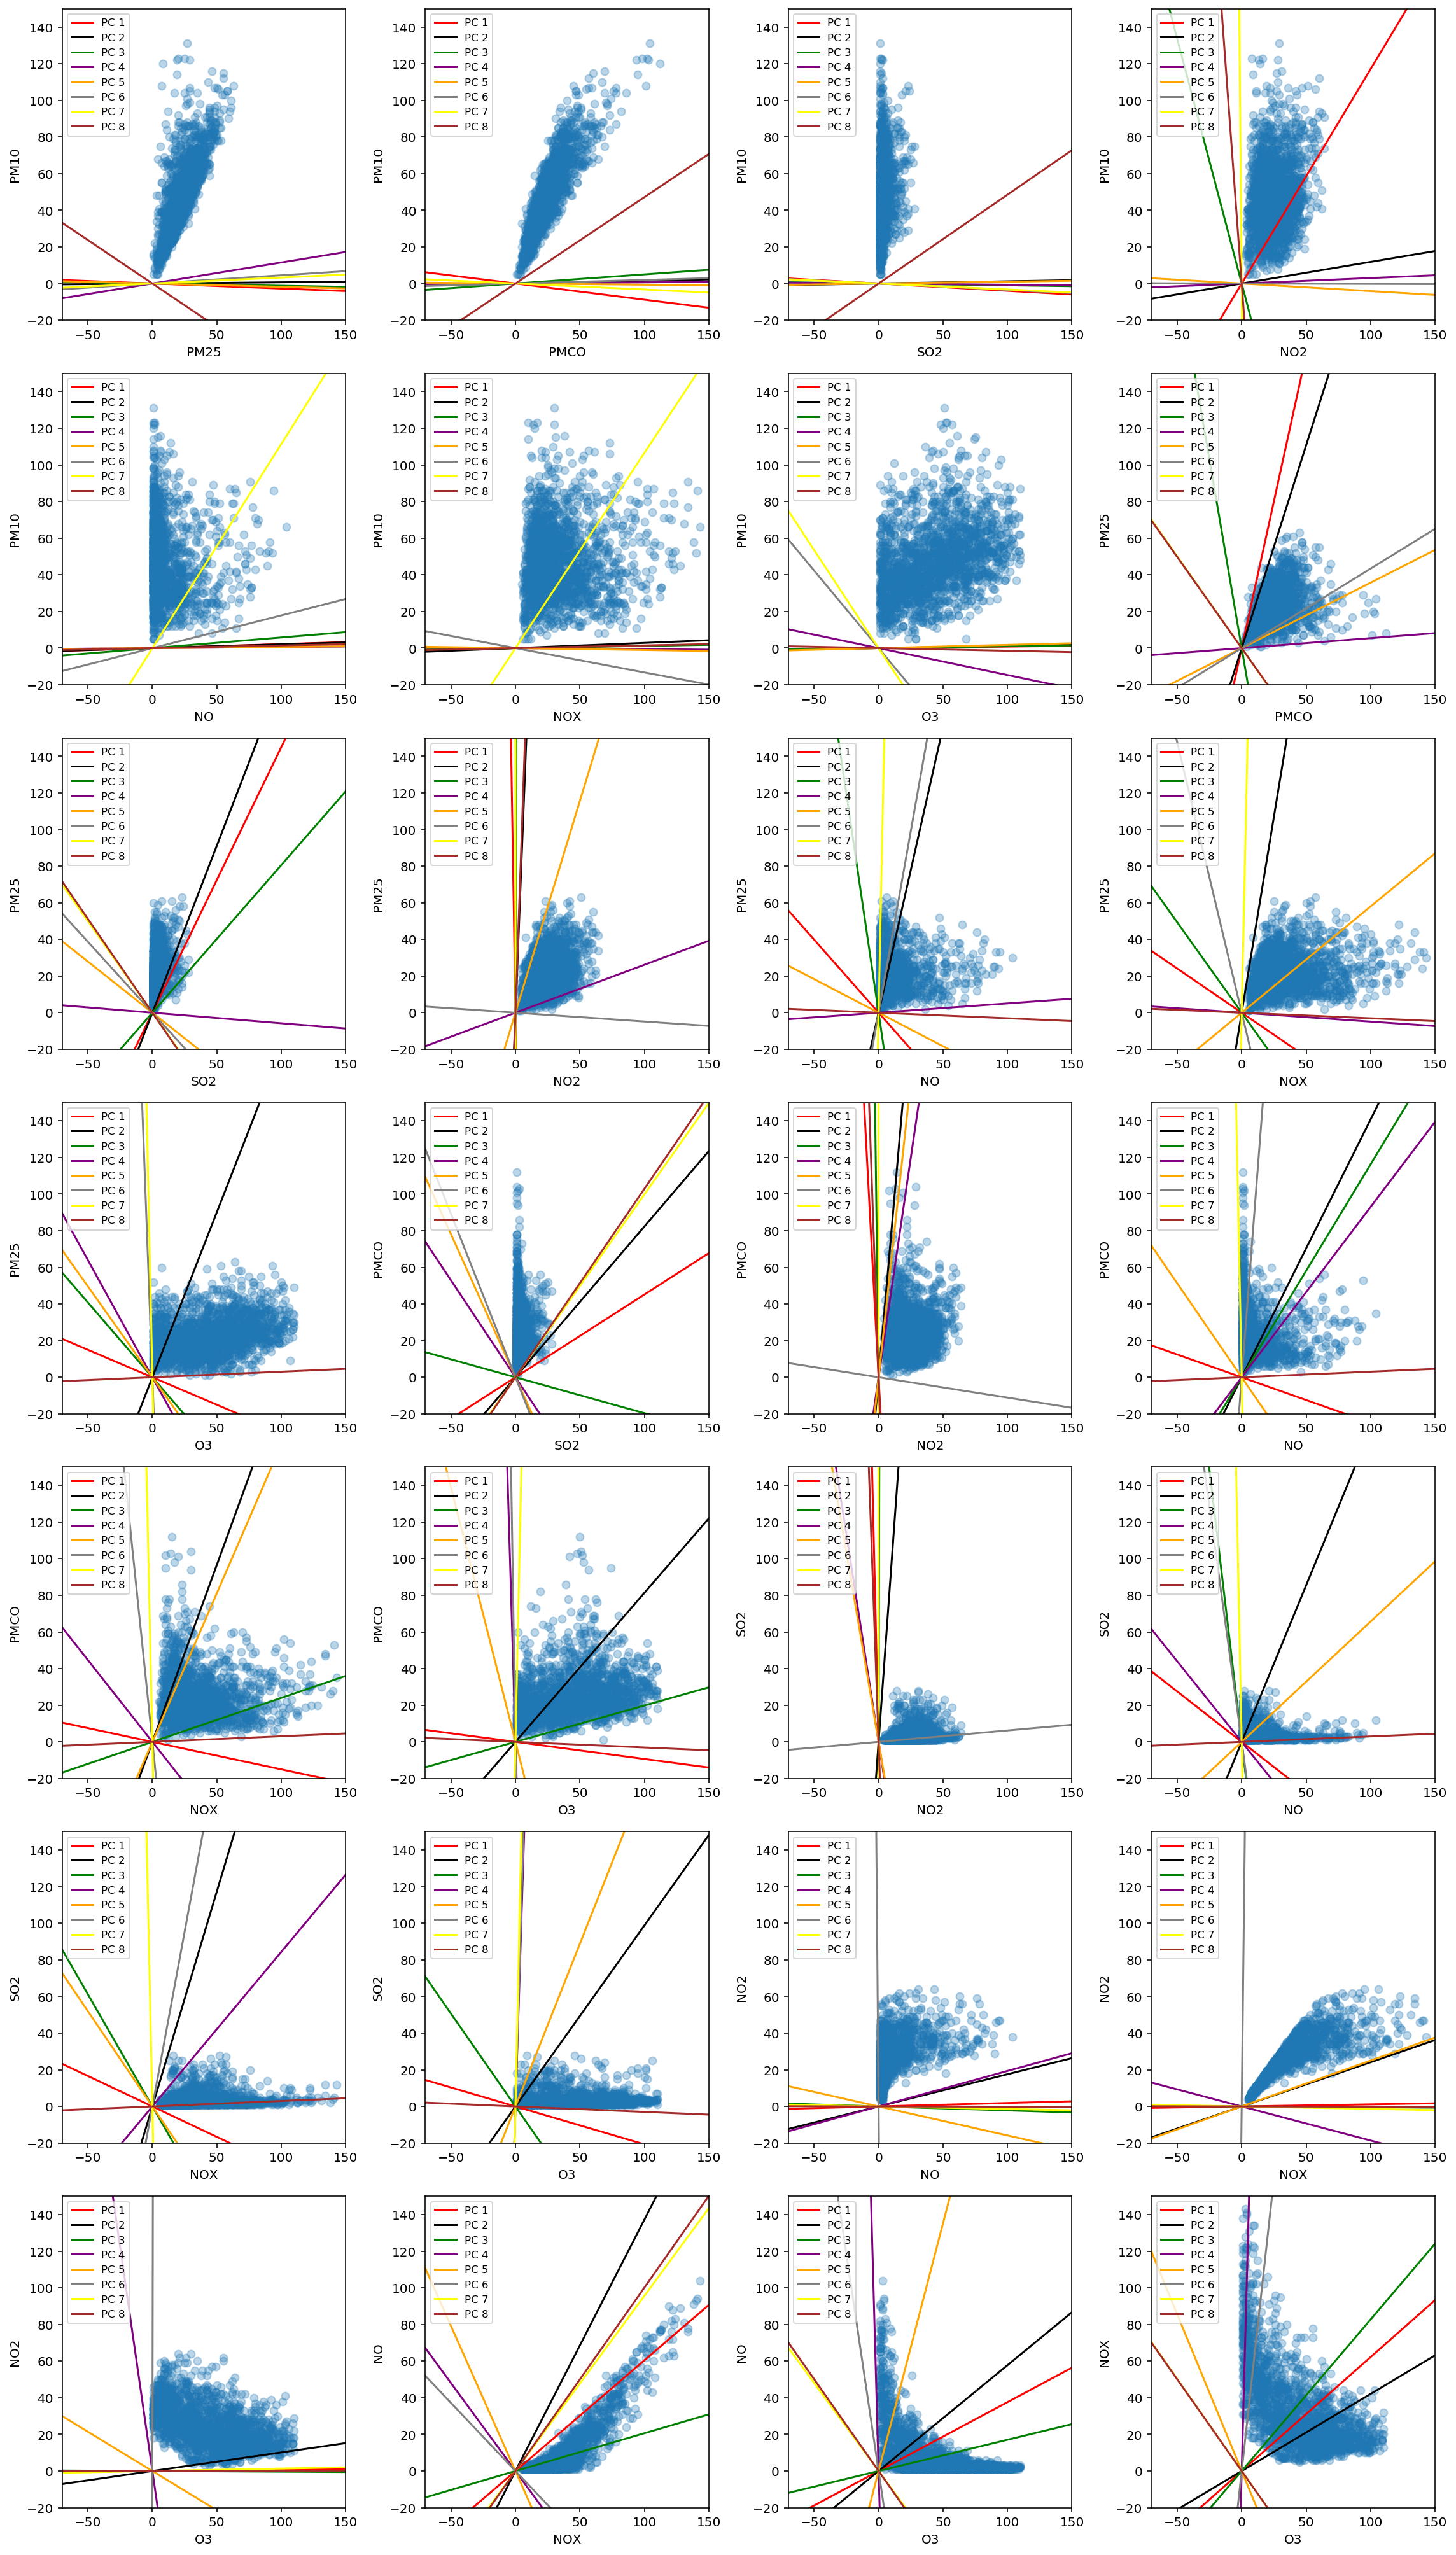

In [58]:
import matplotlib.pyplot as plt

#We do the same method with almost the same code becaus we want the same plots but this time excluding the 'CO' pollutant and get all the possible combination of pollutant loadings principal components excluding CO

#There are significantly more pollutant combinations here between 20-30 plots so we must use the plt.rcParams['figure.max_open_warning'] function to avoid getting the error warning for having too many plot by increasing the max open warning to a number greater than the number of plots being produced so we equate it to 30
plt.rcParams['figure.max_open_warning'] = 30

fig, lines = plt.subplots(7, 4, figsize=(16, 28))

plot_counter = 0

for i in range(1,8):
    for j in range((i+1),9):
        line = lines[plot_counter // 4][plot_counter % 4]
        #line set up the grid postion in which each plot produce will go, where 4 is the number of columns, and the plot_counter starts at zero which we defined outside the for loop and goes up by one for each index iterated in the for loop until the for loop ends, the line equation simply calculates the coordinates of each plot to go in what postion of the grid after defing the row and column numbers in the plt.subplot() function which allows us to have all the plots in a grid which can be exported as one image
        line.scatter(pollutants_only[columns[j]], pollutants_only[columns[i]], alpha=0.3)
        
        line.set_xlim(-70,150)
        line.set_ylim(-20,150)
        line.set_xlabel(columns[j])
        line.set_ylabel(columns[i])
        #We have ommitted CO which has much lower values being measured in ppm, so we increase the xlim and ylim to show the scatter plots more clearly, using the line.set_xlim() and line.set_ylim() functions
        
        line.plot(*comp_line(pollutants_loadings.loc[0, columns[i]]/ pollutants_loadings.loc[0, columns[j]], 0, line ), color = 'red', label='PC 1')
        line.plot(*comp_line(pollutants_loadings.loc[1, columns[i]]/ pollutants_loadings.loc[1, columns[j]], 0, line ), color = 'black', label='PC 2')
        line.plot(*comp_line(pollutants_loadings.loc[2, columns[i]]/ pollutants_loadings.loc[2, columns[j]], 0, line ), color = 'green', label='PC 3')
        line.plot(*comp_line(pollutants_loadings.loc[3, columns[i]]/ pollutants_loadings.loc[3, columns[j]], 0, line ), color = 'purple', label='PC 4')
        line.plot(*comp_line(pollutants_loadings.loc[4, columns[i]]/ pollutants_loadings.loc[4, columns[j]], 0, line ), color = 'orange', label='PC 5')
        line.plot(*comp_line(pollutants_loadings.loc[5, columns[i]]/ pollutants_loadings.loc[5, columns[j]], 0, line ), color = 'gray', label='PC 6')
        line.plot(*comp_line(pollutants_loadings.loc[6, columns[i]]/ pollutants_loadings.loc[6, columns[j]], 0, line ), color = 'yellow', label='PC 7')
        line.plot(*comp_line(pollutants_loadings.loc[7, columns[i]]/ pollutants_loadings.loc[7, columns[j]], 0, line ), color = 'brown', label='PC 8')
        
        #Using the same line.plot() functions for the line and scatter plots but this time swapping out "CO" with columns[j] as we now use two for loops to iterate through all the remaining possible combinations by have i in the range of 1, length of columns -1 and j in range of (i+1), length of the columns list, this avoids having the same index passed into both variables giving the same pollutants data on the x and y axis as it is useless because they both have the same data
        
        line.legend(loc='upper left', fontsize='small')
        
        #Again line.legend() is called to give a legend table for the line colours corresponding to each principal component line
        
        plot_counter += 1
        
plt.tight_layout()

#plt.tight_layout() helps us to have all the plots in one image and side by side in the grid

plt.show()

In [12]:
import matplotlib.pyplot as plt

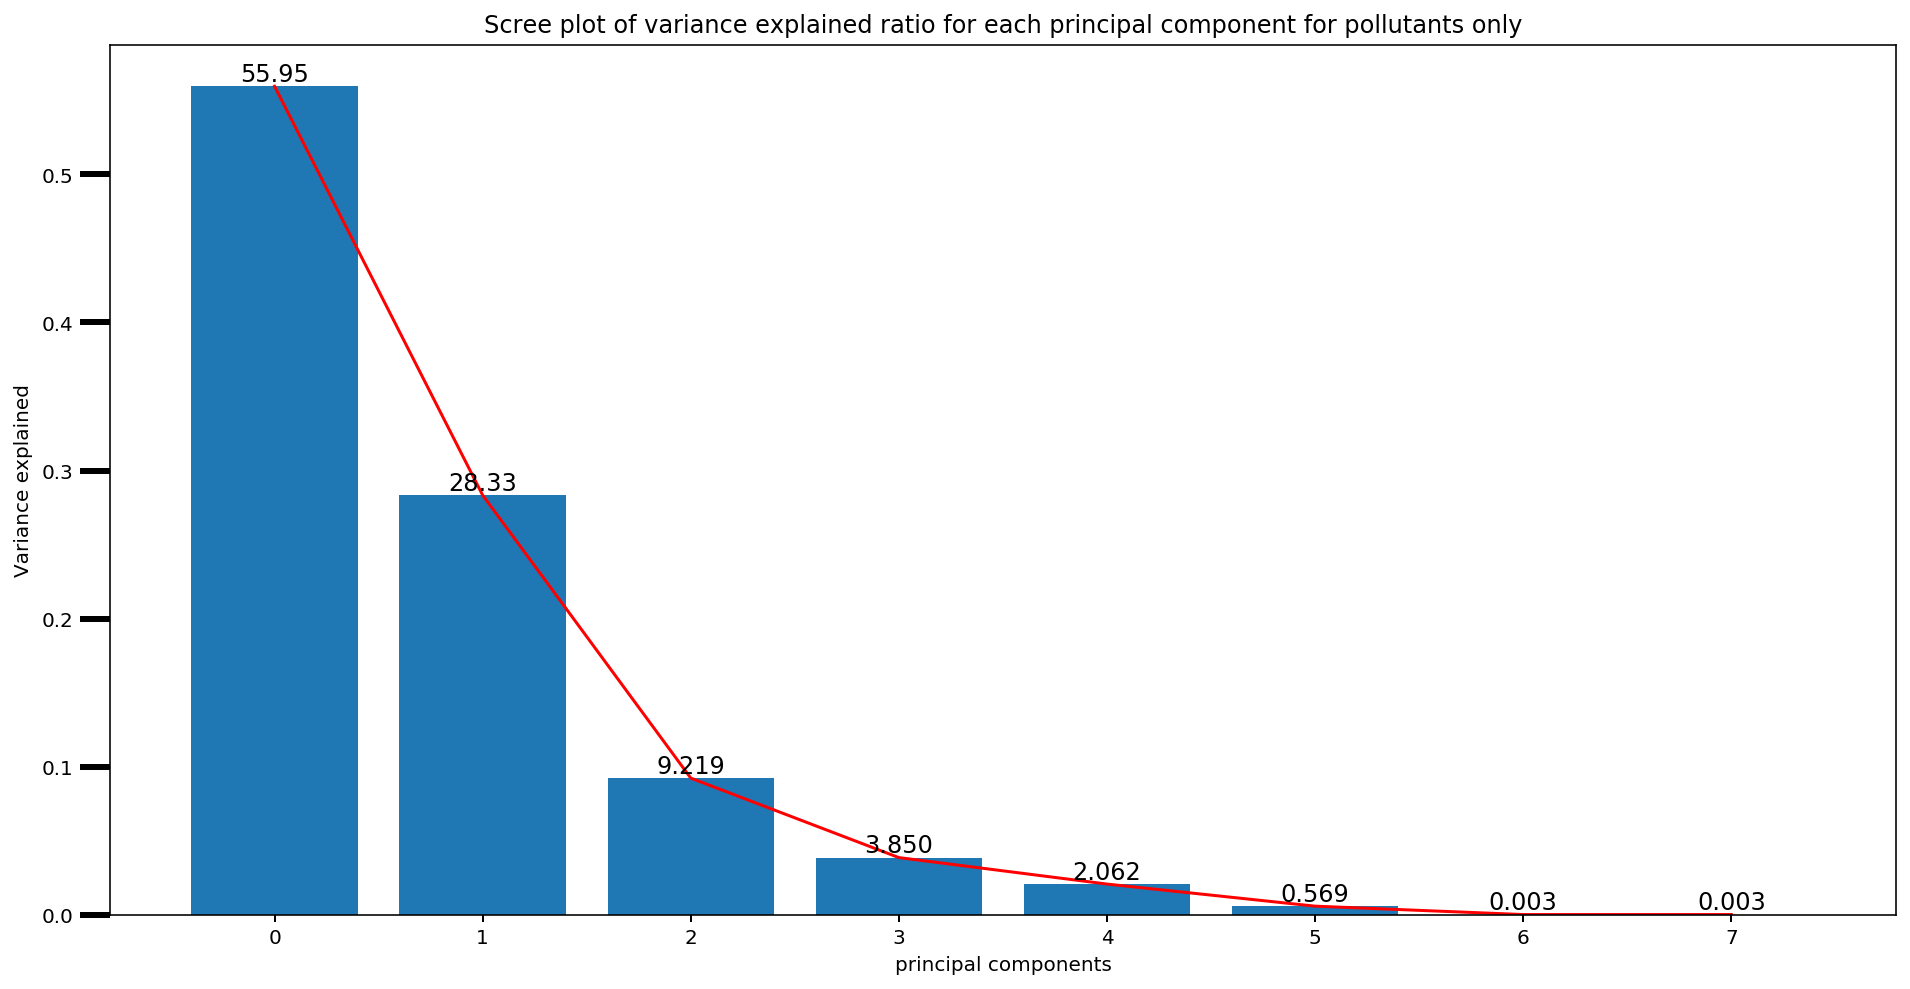

In [13]:
#Now we define a function for the scree plot of the loadings showing the proportions of the data each principal component is responsible for contributing to, defining a function avoids having to repeating the same long block of code when do the plot for the traffic intensities PCA

#Scree plots are useful because it shows us the minimum number of principal components to get an accurate model fo the data


def scree_plot(pca, data_str):
    
    #the scree plot function is defined with the variables of the pca defined for each data set and the data_Str variable is for the title where allows us to differentiate th titles for traffic intensities only or for pollutants only
    
    values = pca.explained_variance_ratio_
    
    #The PCA function pca.explained_variance_ is used to calculate the explained variance ratio in the PCA, define this as values
    
    num_components = len(values)
    
    #To get the number of components we use the len() with explained variance ratio just calculated inside the brackets in the form of the values name
    
    index = np.arange(num_components)
    
    #Using the function np.arrange() to arrange the number of components, with the principal component with largest percentage contribution being first and the principal component with the least being last
    
    plt.figure(figsize=(16,8))
    subplot = plt.subplot(111)
#Use plt.figure() to define the plot and the size of the plot using figsize=(16,8), then plt.subplot() is used so the line plot and bar plot of the scree plot are produced on the same plot

    subplot.bar(index,values)
    
    #Use subplot.bar() function to plot the bar chart with index on the x-axis and the explained variance ratio values on the y-axis
    
    subplot.plot(values, color = 'red')
    
    #Subplot.plot() is used to plot the line touch the top of each bar for each index then dropping to the next bar using the explained variance ratios values data and the color = 'red' to make the line red to differentiate from the bar chart colour

    for i in range(num_components):
        subplot.annotate(r"%s" % ((str(values[i]*100)[:5])), (index[i], values[i]), va = 'bottom', ha = 'center', fontsize = 12)
        
        #Now on the scree plot want to show the percentage of data each principal component contributes in the model, we do this by using a for loop in range of the length of values to iterate through the principal components data 
        
        #To calculate the percentage we multiply the explained variance ratio value for principal component by 100 to get the percentage with [:5] to give 5 significant figures shown on each bar using the subplot.annotate() function, where in order to annotate it on the plot the calculate code has to be done inside a str() function to make it a string
        
        #the va and ba parameters are just used to change the position of the annotations in the plot, and fontsize simple just changes the size of the font for readabilty
        
    subplot.xaxis.set_tick_params(width=1)
    subplot.yaxis.set_tick_params(width =3, length=15)
    
    #Use subplot.yaxis.set_ticks_params() and subplot.xaxis.set_ticks_params() to select the numbers and how many you see on the x and y axis margins
    
    subplot.set_xlabel('principal components')
    subplot.set_ylabel('Variance explained')
    plt.title(f'Scree plot of variance explained ratio for each principal component {data_str}')
    plt.show()
    #call subplot.set_xlabel(), subplot.set_ylabel() and plt.title() functions to set the labels of the x and y axis and the main title of the scree plot
    
    #putting f before the string in plt.title() allows us to put in the data_str variable to have the title for what data set we are using
    return plt.show()

#Finallt return plt.show() to output all the subplots on the main plot

pol = "for pollutants only"
scree_plot(pca, pol)

#Simply parse in our desired variables to get the scree plot for the pollutants loadings principal components

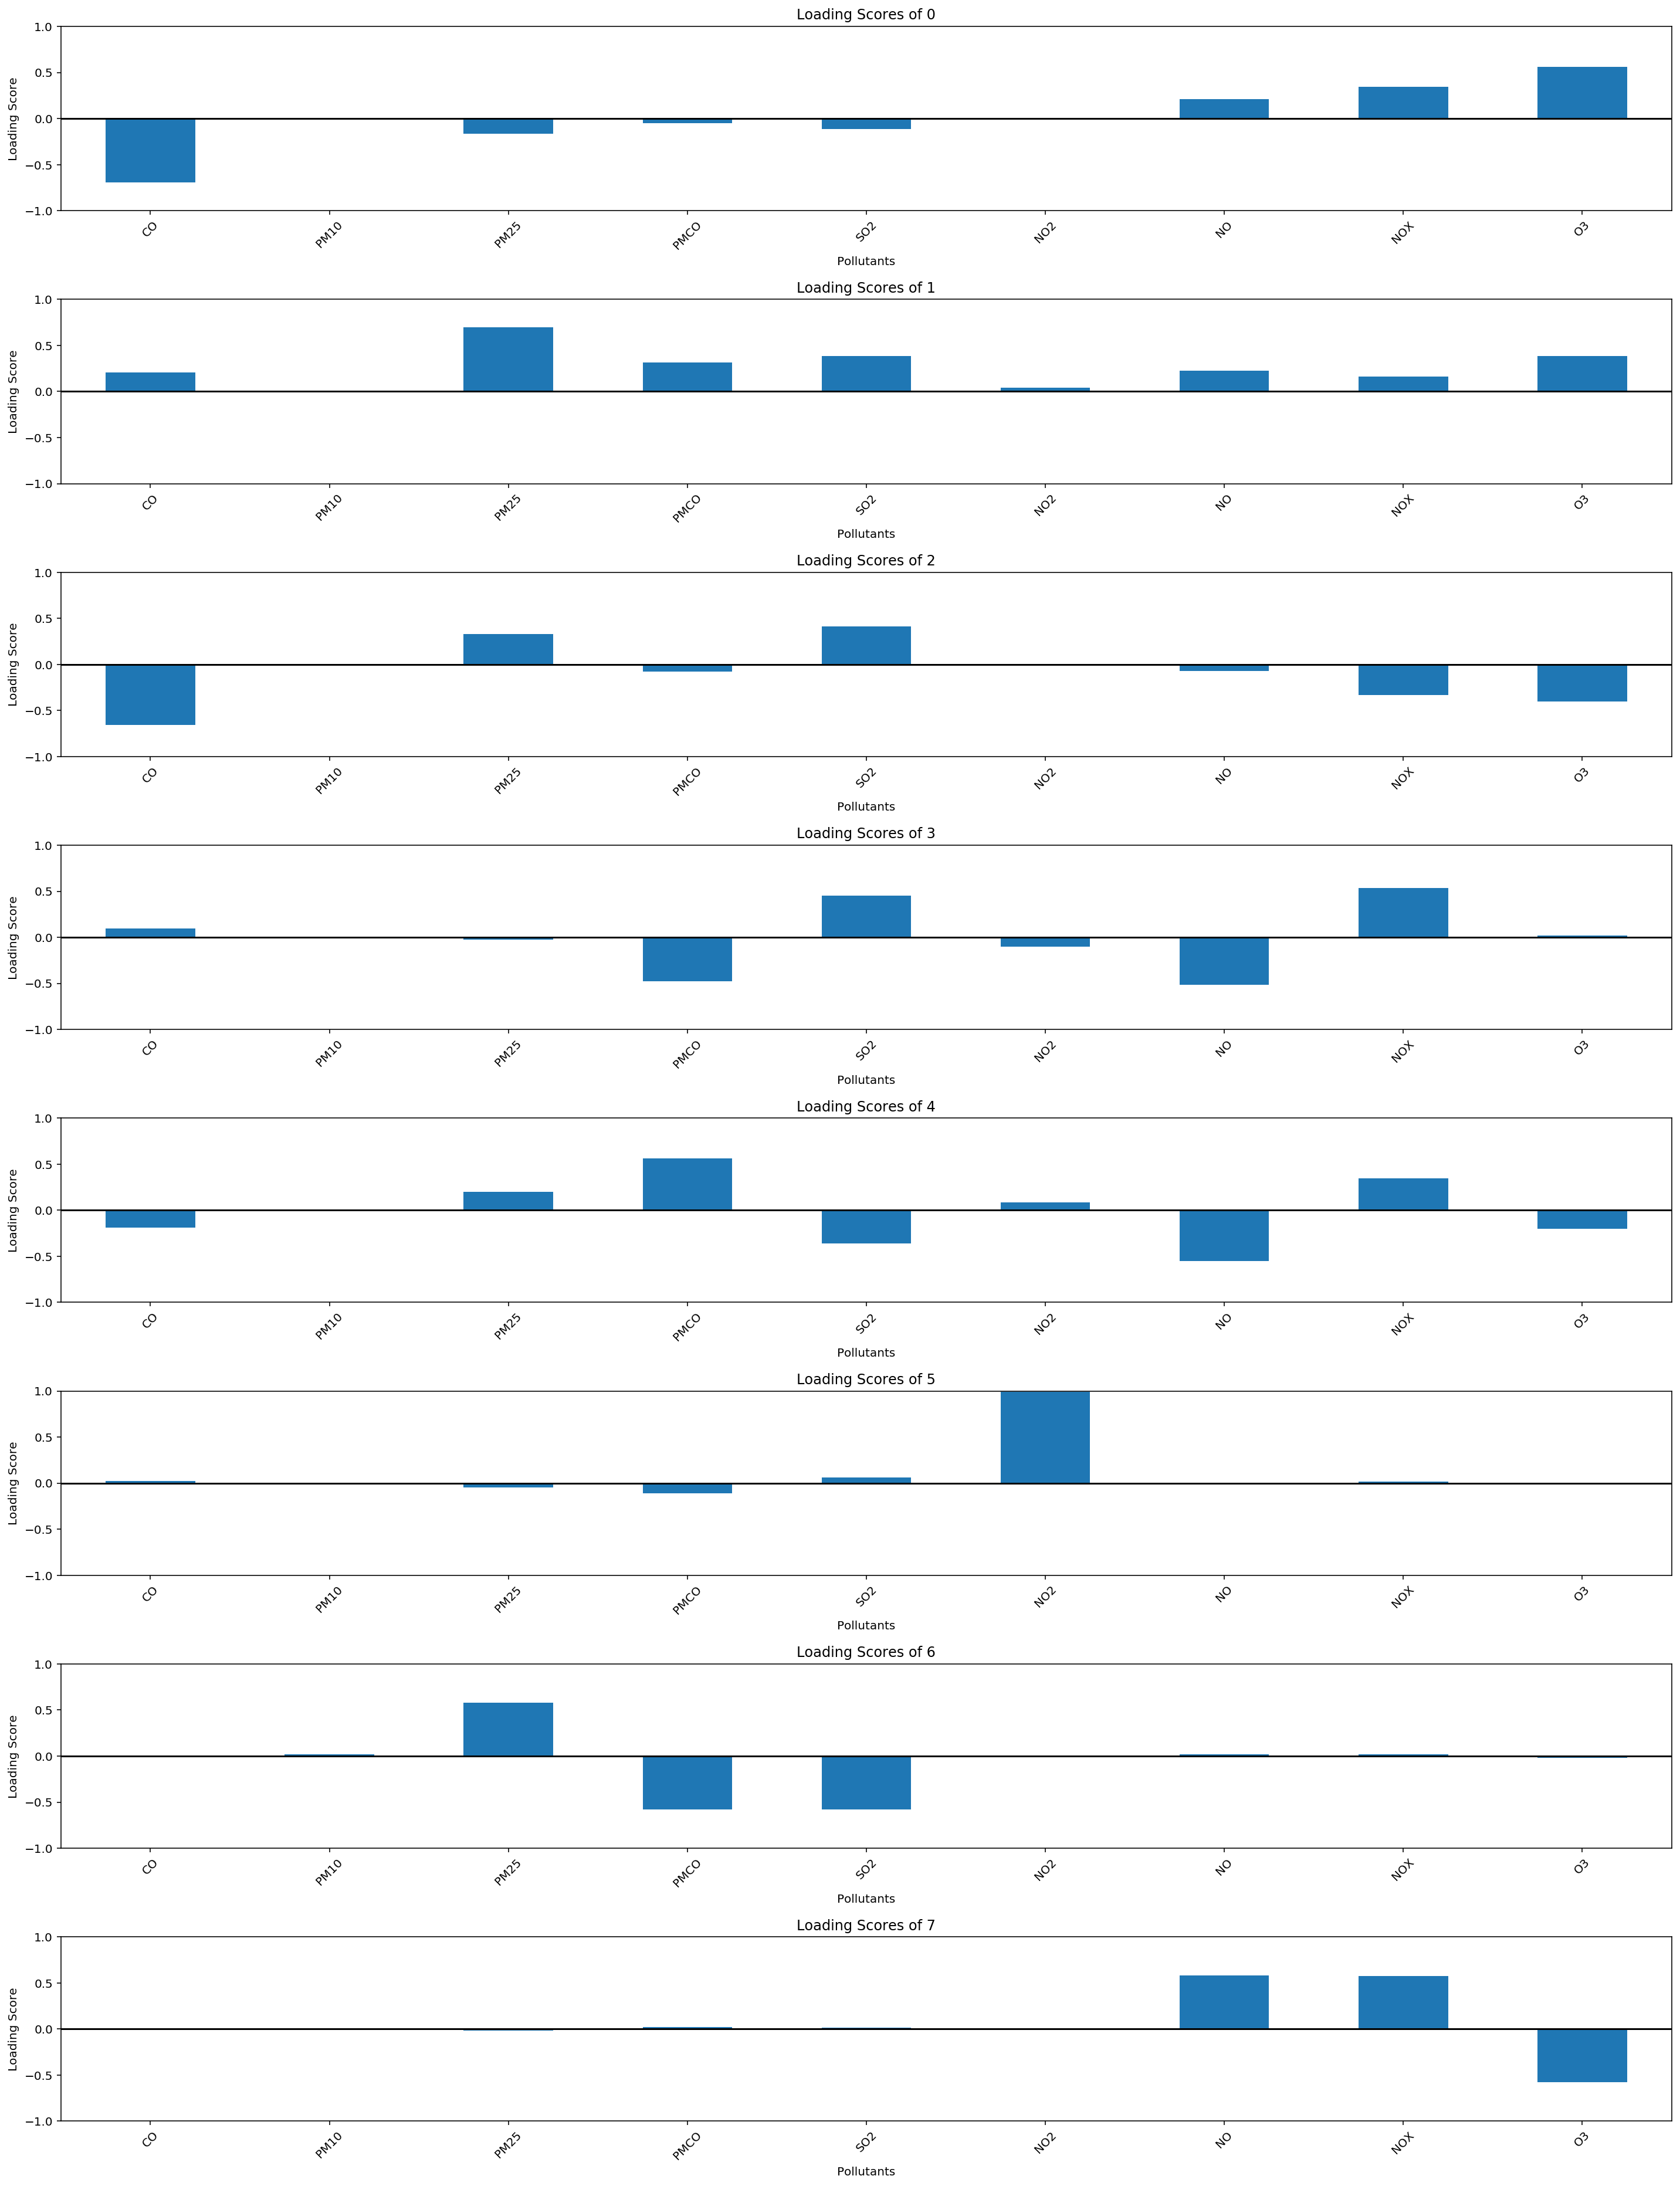

In [14]:
#Now we define a function to generate plots for interpreting the principal components, which we will do for the traffic intensities as well, so defining it as a function avoid repeating unnecessary code we have already written

def loadings_plot(pollutants_loadings, PCs, columns):
    
    # The function take 3 parameters: pollutants loadings the loadings of the principal components from the PCA of the dataset we use, PCs is the number of principal components, columns which are just the numerical variables of the data set in the form of a list of strings of the column names of the laodings data frame
    
    fig, axes = plt.subplots(PCs, 1, figsize=(20, 26))
    
    #Defing the subplot as gi, axes to input our figsize, number of principal components as PCs and the number of plots
    
    for i, (pc, ax) in enumerate(zip(pollutants_loadings.index, axes)):
        pollutants_loadings.loc[pc].plot(kind='bar', ax=ax)
        ax.set_title(f'Loading Scores of {pc}')
        ax.set_xlabel('Pollutants')
        ax.set_ylim(-1, 1)
        ax.axhline(color='black')
        ax.set_xticks(range(len(columns)))
        ax.set_xticklabels(columns, rotation=45)
        ax.set_ylabel('Loading Score')
        #We use a for loop to iterate through enumerated indexes of the loadings data set, with axes as the second variable as defined in the above subplot, this zipped inside the enumerate() function too using the zip() function, the iteration variable are i, pc, ax
        
        #ax is used to do the subplots suing function previously used to define tick number on the axes, axes labels, title, limits
        
        #loadings.loc[pc].plot() specifying the kind='bar' generates the bar plots first, and as we use the pc variable it iterates through all the principal components to give 8 bar plots with the pollutants/components on the x axis
        
        #ax.axhline() is use to have a clear line for y=0 is, to determine whether the values of the principal components for each pollutant are negative or positive in a more clear way visually
        
    plt.tight_layout()
    plt.show()
    return plt.show()

#plt.tight_layout() is used so we get one imagine of all 8 plots of the principal components, making for easy comparison, then return plt.show() for the full plot

loadings_plot(pollutants_loadings, 8, columns)

#As before we just call the function we have just defined with the parameters for pollutants only loadings

#### Note: from here it is exactly the same as the above as we are just doing the same thing but this time we are doing a PCA for the traffic intensities only



In [15]:
traffic_columns = ['Green', 'Orange', 'Red', 'Brown']
traffic_intensities = concatenated_sensors[traffic_columns]

traffic_intensities

Green    Orange       Red     Brown
0     0.049900  0.010319  0.000849  0.000000
1     0.073155  0.016205  0.001243  0.000065
2     0.078598  0.024826  0.003567  0.000814
3     0.085133  0.028725  0.001937  0.000370
4     0.078208  0.031621  0.002731  0.000314
...        ...       ...       ...       ...
1897  0.068963  0.014254  0.000634  0.000028
1898  0.066278  0.015165  0.001172  0.000079
1899  0.067571  0.014972  0.000878  0.000323
1900  0.069048  0.012776  0.001146  0.000170
1901  0.068187  0.014678  0.000772  0.000062

[1902 rows x 4 columns]

In [16]:
traffic_intensities.describe()

Green       Orange          Red        Brown
count  1902.000000  1902.000000  1902.000000  1902.000000
mean      0.068098     0.019259     0.001482     0.000285
std       0.007765     0.011147     0.001106     0.000419
min       0.000000     0.000000     0.000000     0.000000
25%       0.066165     0.011972     0.000700     0.000027
50%       0.068666     0.014352     0.001061     0.000138
75%       0.071383     0.029075     0.002175     0.000373
max       0.091973     0.048674     0.006063     0.004882

In [17]:
traffic_keys = traffic_intensities.keys()
traffic_shape = traffic_intensities.shape
print( "keys:", traffic_keys)
print("shape:", traffic_shape)

keys: Index(['Green', 'Orange', 'Red', 'Brown'], dtype='object')
shape: (1902, 4)


In [18]:
#Same as before but perform train, test, split for the traffic intensities

traffic_target = traffic_intensities['Green']
rest_of_traffic = traffic_intensities.drop(['Green'], axis=1)

scaler = StandardScaler()
no_pca_scaled = scaler.fit_transform(rest_of_traffic)

traf_train0, traf_test0, target_train0, target_test0 = train_test_split(no_pca_scaled, traffic_target, test_size=0.3, random_state=30)

model = LinearRegression()
model.fit(traf_train0, target_train0)
model.score(traf_test0, target_test0)

#Returning the non pca linear regression score for traffic intensities

0.3640101160665209

In [33]:
scaler = StandardScaler()
scaled_data_traf = scaler.fit_transform(rest_of_traffic)

traf_pca = PCA(n_components=3)
scaled_traf_pca = traf_pca.fit_transform(scaled_data_traf)

traf_train, traf_test, target_train, target_test = train_test_split(scaled_traf_pca, traffic_target, test_size=0.3, random_state=30)

model = LinearRegression()
model.fit(traf_train, target_train)
model.score(traf_test, target_test)

#Now perform the PCA train, test, split but for traffic intensities, because there are less components the pca score is essentially the same as the non_pca score, even with the pollutants wiht significantly more pollutants the difference in scores was still minimal/neglegible

0.3640101160665209

In [36]:
scaler = StandardScaler()
scaled_data_traf = scaler.fit_transform(rest_of_traffic)

traf_pca2 = PCA(n_components=2)
scaled_traf_pca2 = traf_pca2.fit_transform(scaled_data_traf)

traf_train2, traf_test2, target_train2, target_test2 = train_test_split(scaled_traf_pca2, traffic_target, test_size=0.3, random_state=30)

model = LinearRegression()
model.fit(traf_train2, target_train2)
model.score(traf_test2, target_test2)

#Can see the minimal amount of principal components are 2, which is a low number because there are only 3 principal components in total

#Comparing the score value is about 0.32 and the one with all the principal components is about 0.36, so gives the majority of data, a larger proportion than for the pollutants as there are significantly less principal components than for the pollutants

0.32356338095339654

In [20]:
traf_columns = ['Green', 'Orange', 'Red', 'Brown']
traf_pca.fit(traffic_intensities)
traf_loadings = pd.DataFrame(traf_pca.components_, columns= traf_columns)

traf_loadings

Green    Orange       Red     Brown
0 -0.476549 -0.875632 -0.076273 -0.018759
1 -0.879006  0.473023  0.056826  0.019195
2  0.015778 -0.095829  0.893956  0.437504

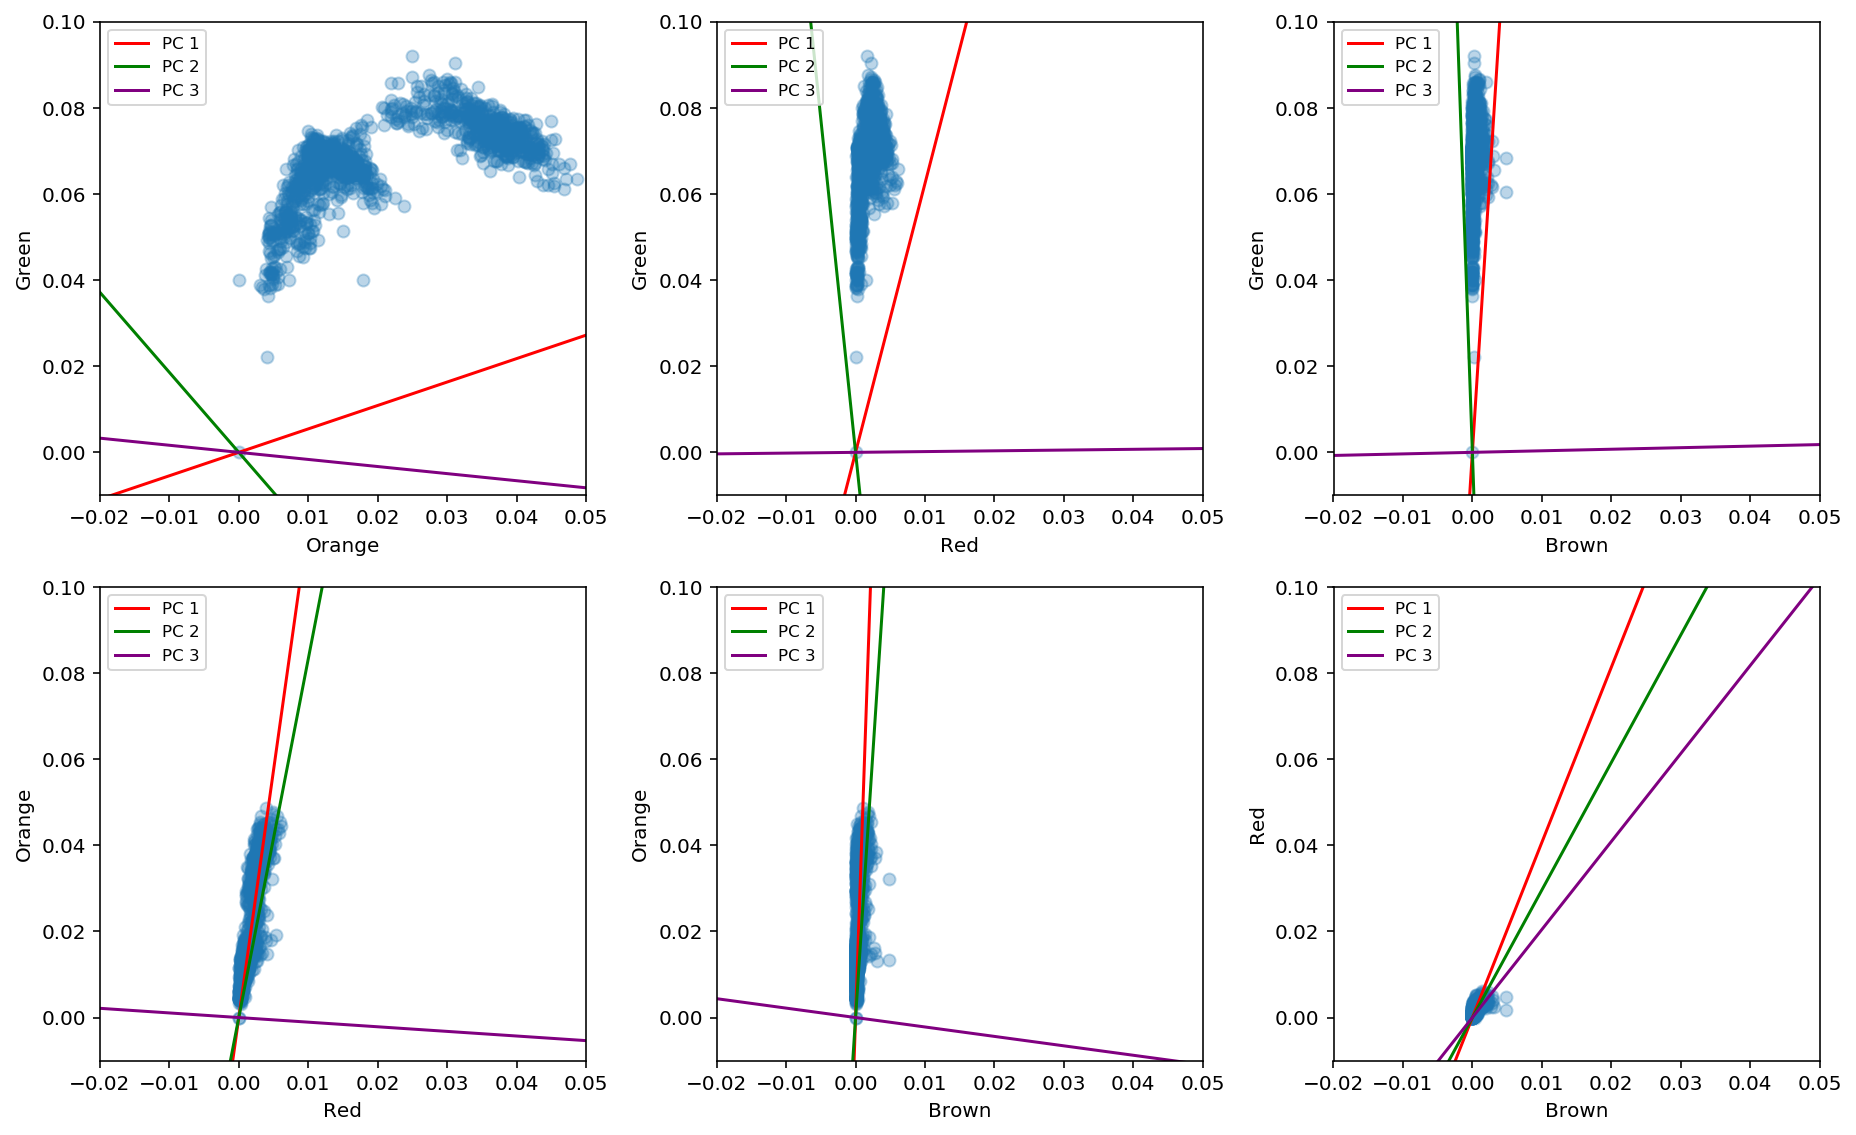

In [64]:
#One for loop (two for loops but all the plots are done in this one instead of separating it out as before with pollutants) as the units are the same and values relatively similar
fig, traf_lines = plt.subplots(2, 3, figsize=(13, 8))

plot_counter2 = 0
for i in range(0,3):
    for j in range((i+1),4):
        traf_line = traf_lines[plot_counter2 // 3][plot_counter2 % 3]
        
        traf_line.scatter(traffic_intensities[traf_columns[j]], traffic_intensities[traf_columns[i]], alpha=0.3)
        traf_line.set_xlim(-0.02,0.05)
        traf_line.set_ylim(-0.01,0.1)
        traf_line.set_xlabel(traf_columns[j])
        traf_line.set_ylabel(traf_columns[i])
        traf_line.plot(*comp_line(traf_loadings.loc[0, traf_columns[i]]/ traf_loadings.loc[0, traf_columns[j]], 0, line ), color = 'red', label= "PC 1")
        traf_line.plot(*comp_line(traf_loadings.loc[1, traf_columns[i]]/ traf_loadings.loc[1, traf_columns[j]], 0, line ), color = 'green', label = "PC 2")
        traf_line.plot(*comp_line(traf_loadings.loc[2, traf_columns[i]]/ traf_loadings.loc[2, traf_columns[j]], 0, line ), color = 'purple', label = "PC 3")
        traf_line.legend(loc='upper left', fontsize='small')
        plot_counter2 += 1
        
plt.tight_layout()

plt.show()

#This is the same emthod and proccess as the double for loop in pollutants, except the range of the for loop is for the traffic_intensities list and the data used is from the PCA loadings for traffic intensities instead of the pollutants

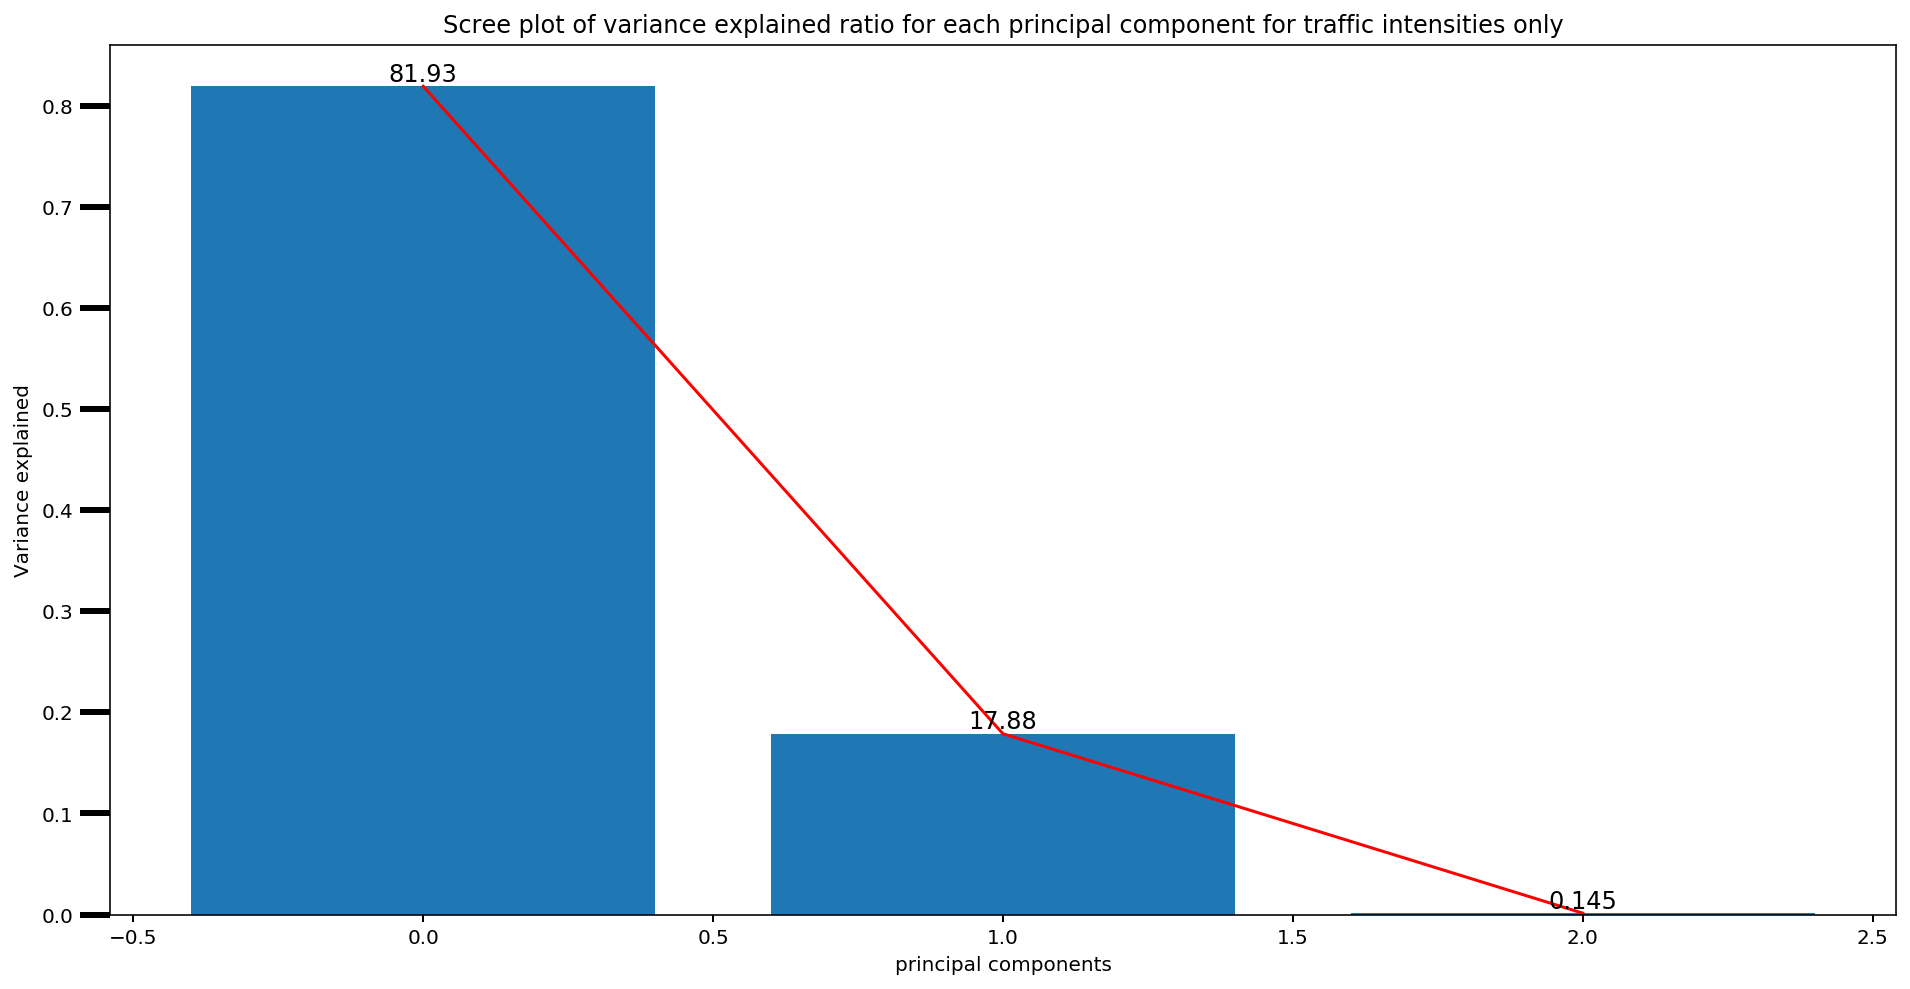

In [22]:
pol2 = "for traffic intensities only"
scree_plot(traf_pca, pol2)

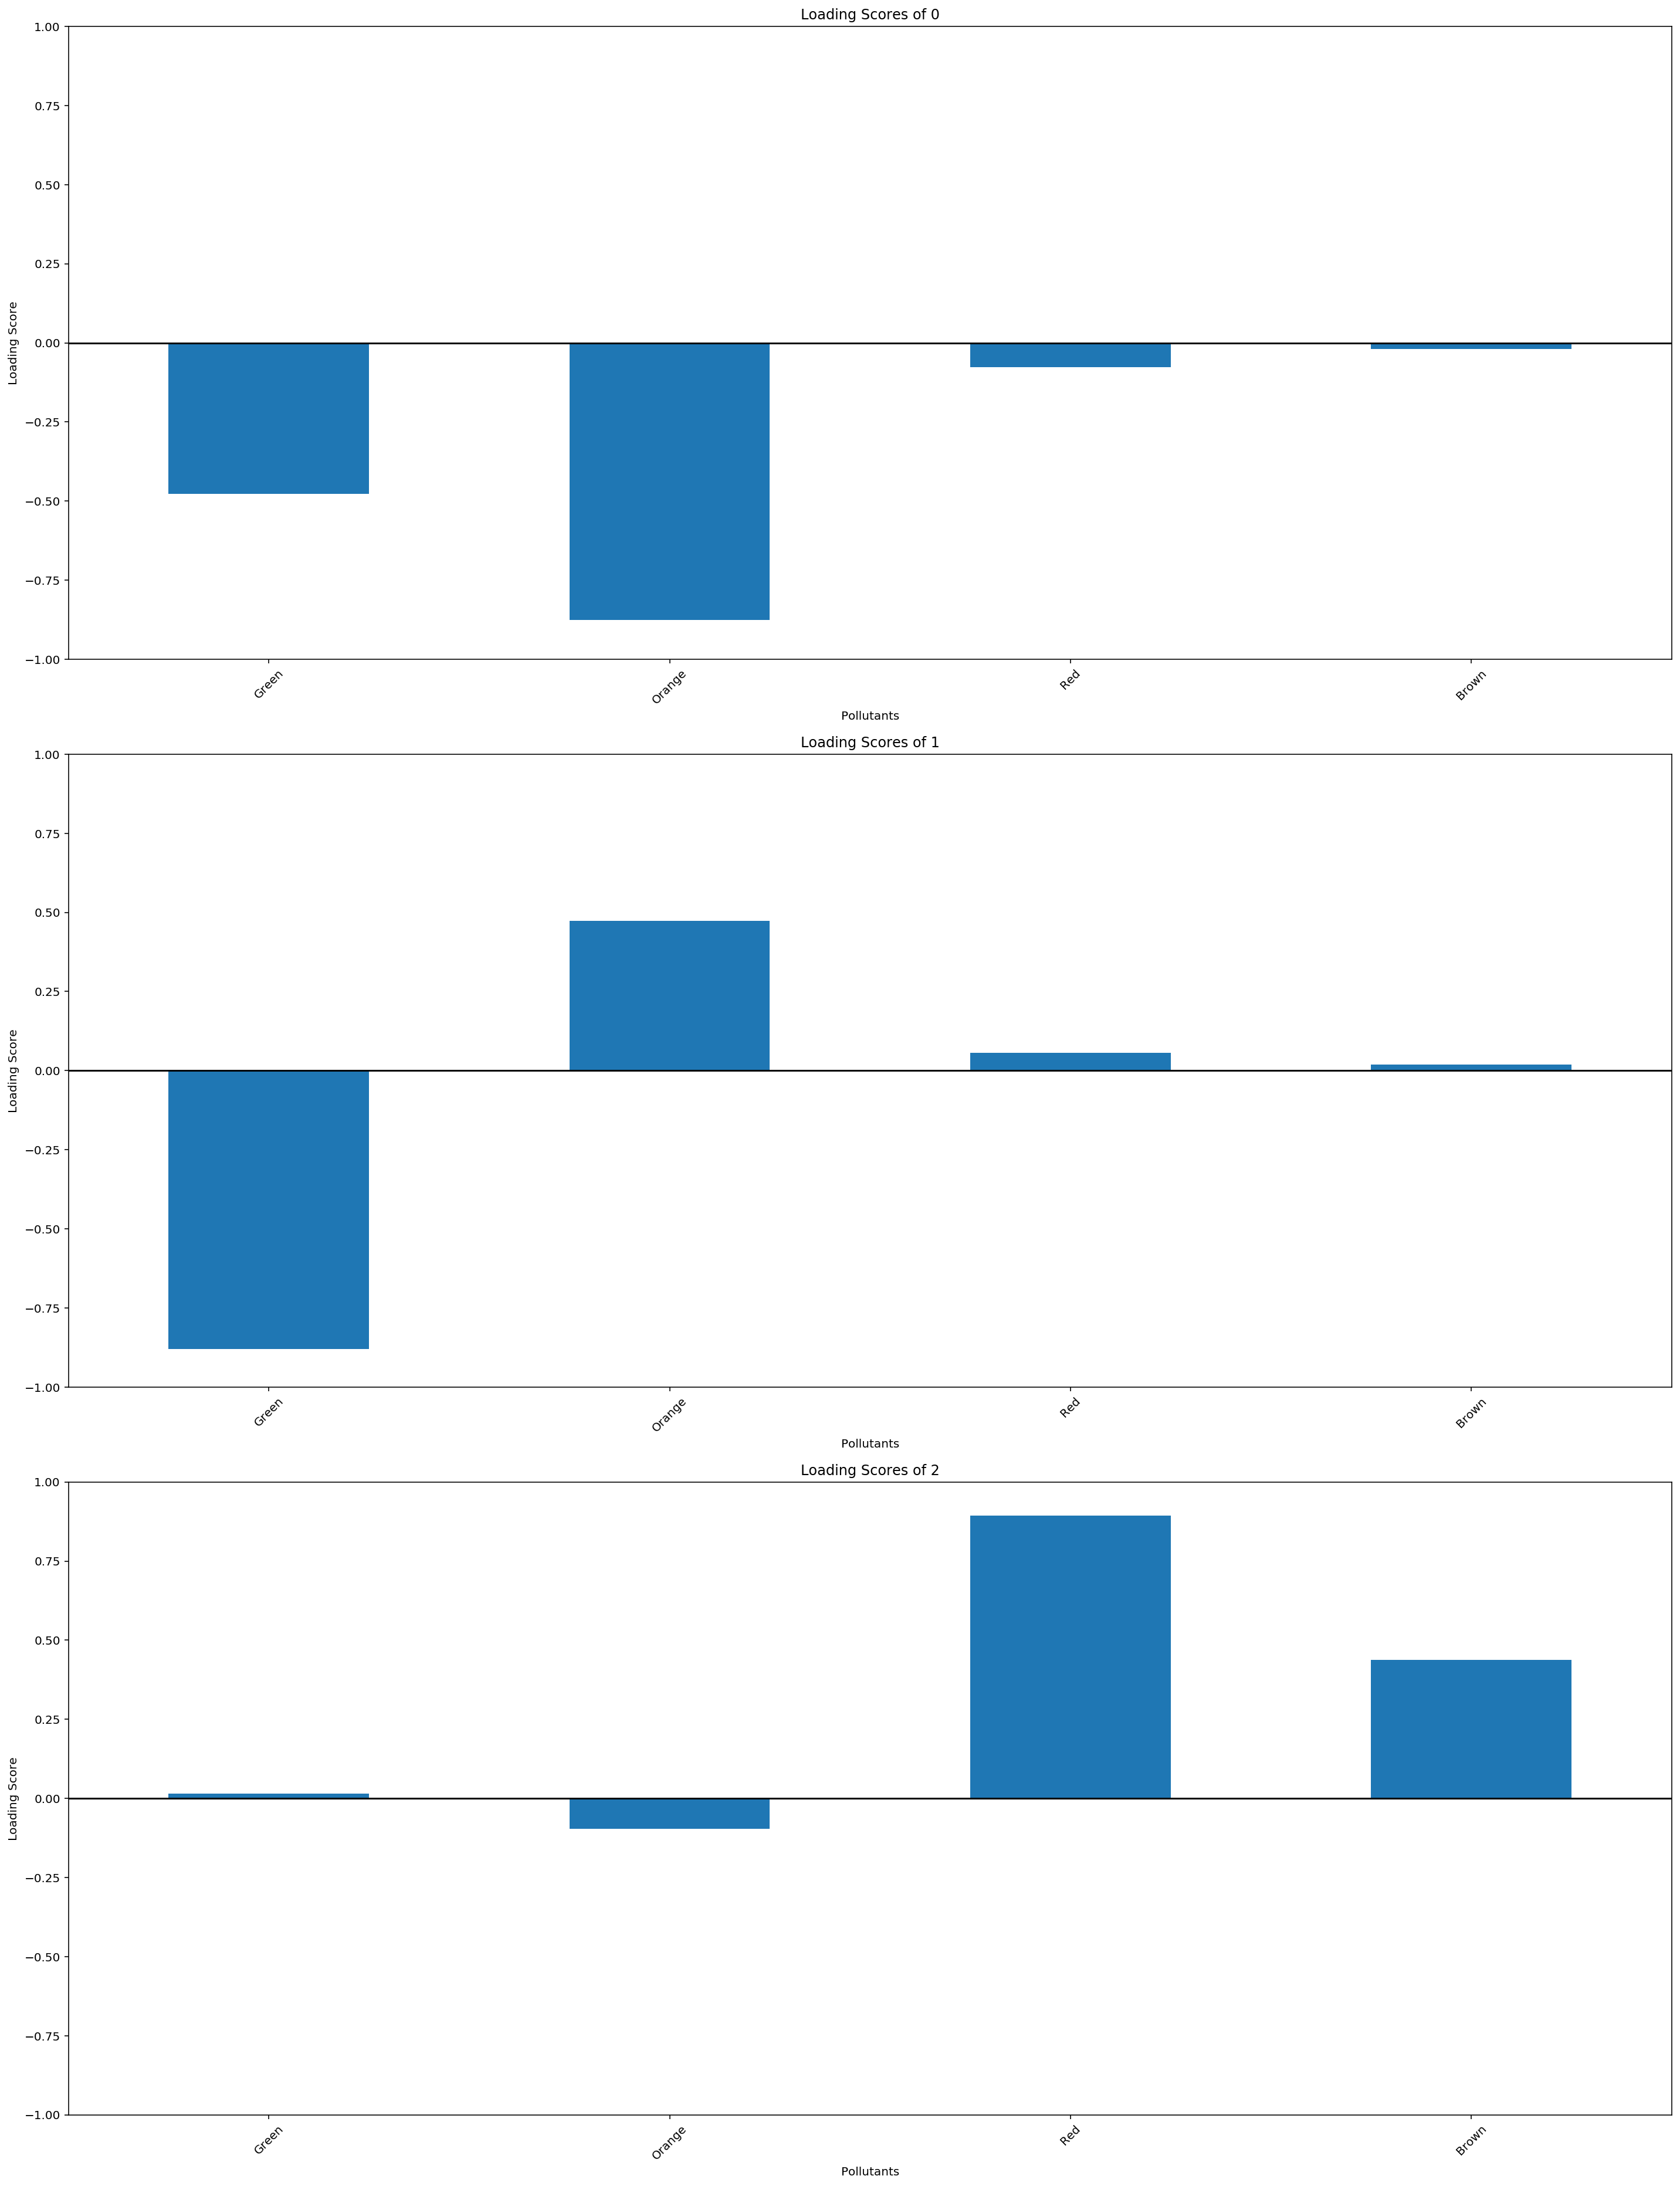

In [23]:
loadings_plot(traf_loadings, 3, traf_columns)

Reference: Some of the code in this modelling section was based of code found in the examples, as i wasn't sure how to approach coding for some of the modelling concepts, i am talking about the examples in Lecture Notes 6, for the Principal Component Analysis parts

[https://qmplus.qmul.ac.uk/pluginfile.php/3587618/mod\_resource/content/18/notes06.pdf](https://qmplus.qmul.ac.uk/pluginfile.php/3587618/mod_resource/content/18/notes06.pdf)
